# `nb03b`: Data visualization principles

## Encoding data using visual cues

Whenever we visualize, data is encoded using visual cues. It is mapped onto variations in size, shape, color, area, angle, etc.

<img src="./figures/nb04/cues1.jpg" width="30%" />

These cues, however, are not perceived equally well across people (Cleveland and McGill, 1980). 

<img src="./figures/nb04/cues2.jpg" width="30%" />

(Figures reproduced from [Peter Aldhous, 2019](https://paldhous.github.io/ucb/2019/dataviz/week2.html).)

<div class="alert alert-danger">
    
- For numerical quantities, **positions** and **lengths** are perceived the most accurately. 
- For categorical values, **shapes** are perceived the most accurately.
   
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

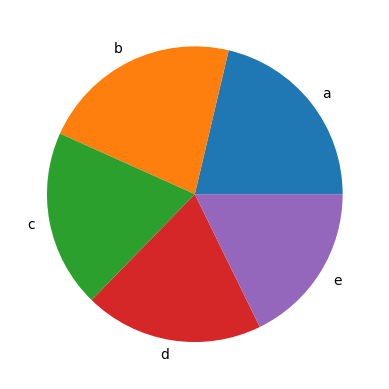

In [2]:
# Which part is the largest?
fig = plt.figure()
ax = plt.axes()

x = np.ones(5) + 0.075*np.random.randn(5)
labels = ["a", "b", "c", "d", "e"]
ax.pie(x, labels=labels)

plt.show()

Answering is difficult because shapes and areas are not perceived accurately nor equally well across people.

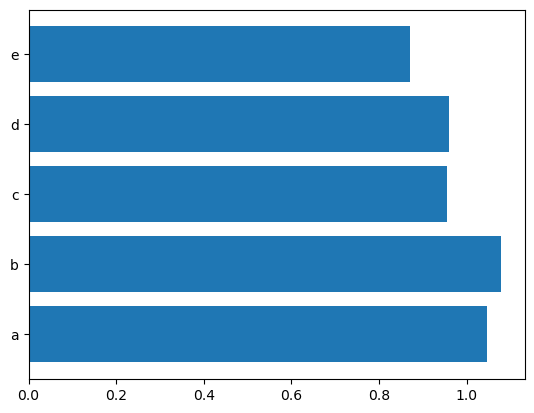

In [3]:
# Using lengths
fig = plt.figure()
ax = plt.axes()

ax.barh(labels, width=x)

plt.show()

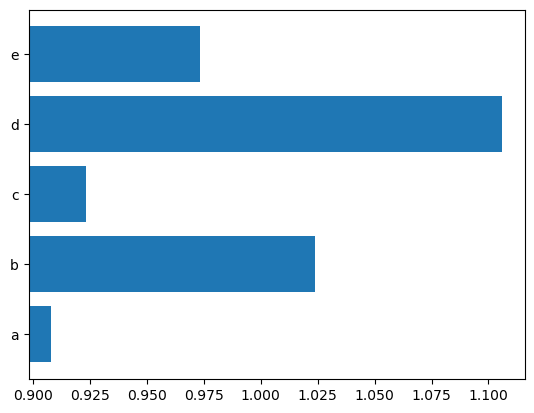

In [17]:
# Using positions
fig = plt.figure()
ax = plt.axes()

ax.barh(labels, width=x)
ax.set(xlim=(np.min(x)-0.01, np.max(x)+0.01))

plt.show()

## Show the data

Showing the data is the most important principle of data visualization. However, choosing the right representation and the appropriate level of granularity is not always easy. 

- If the data is too granular, the visualization will be too busy and the interpretation can be difficult.
- If the data is not granular enough, the visualization will be too coarse and important details can be lost.

In [6]:
# Summaries vs. data
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = np.array([(x, y1), (x, y2), (x, y3), (x4, y4)])

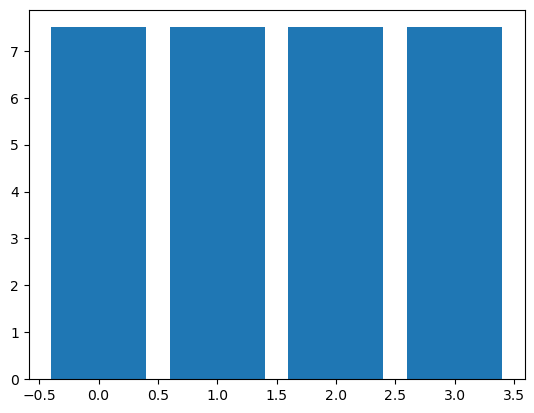

In [7]:
fig = plt.figure()
ax = plt.axes()

ax.bar(range(4), height=np.mean(datasets[:, 1, :], axis=1))

plt.show()

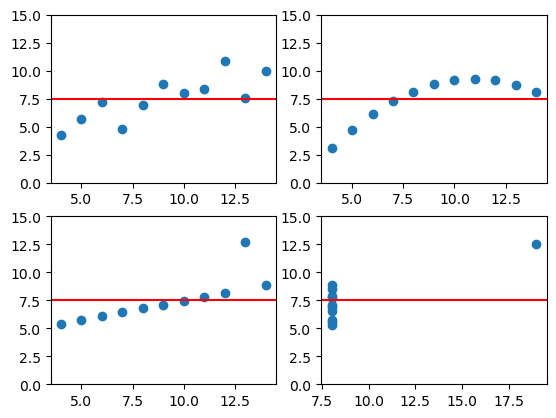

In [8]:
fig, axs = plt.subplots(2, 2)

for n, ax in enumerate(axs.ravel()):
    ax.scatter(datasets[n, 0], datasets[n, 1])
    ax.axhline(np.mean(datasets[n, 1]), color="r")
    ax.set(ylim=(0, 15))
    
plt.show()

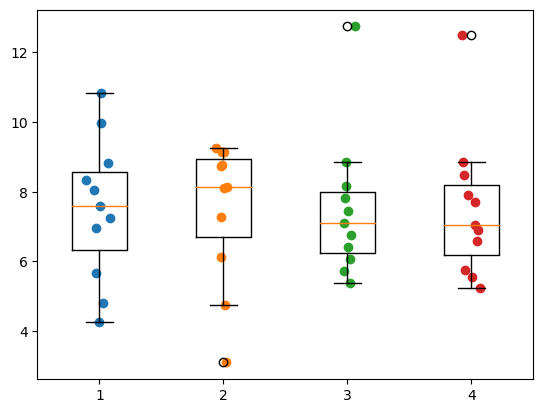

In [9]:
# A mix of both summaries and data
fig = plt.figure()
ax = plt.axes()

ax.boxplot(datasets[:, 1].T)
for i in range(4):
    y = datasets[i, 1]
    ax.scatter(np.random.normal(i+1, 0.04, size=len(y)), y)

plt.show()

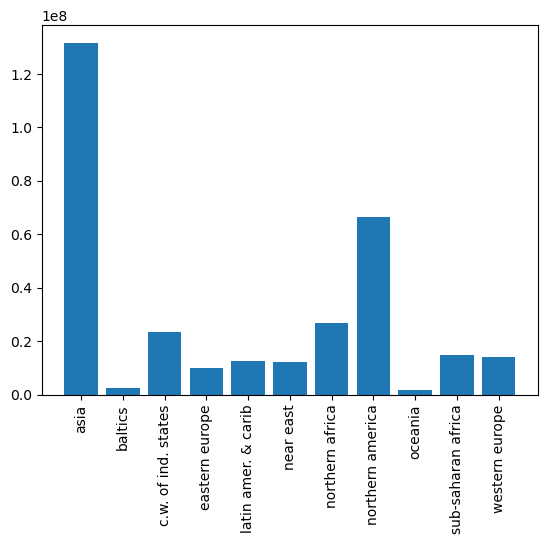

In [12]:
# Another example
df = pd.read_csv("data/countries.csv")
regions = df.groupby("Region")["Population"].mean()
labels = [r.strip().lower() for r in regions.index]

fig = plt.figure()
ax = plt.axes()
ax.bar(range(len(labels)), height=regions.values)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.show()

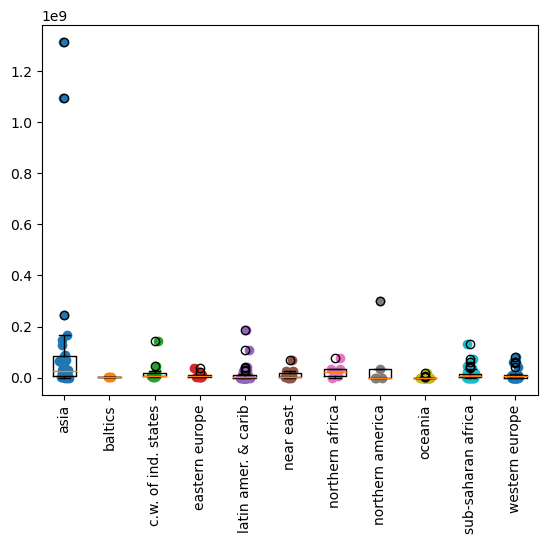

In [13]:
df = pd.read_csv("data/countries.csv")

fig = plt.figure()
ax = plt.axes()

for i, (r, s) in enumerate(df.groupby("Region")["Population"]):
    r = r.strip().lower()
    ax.scatter(np.random.normal(i+1, 0.05, size=len(s)), s)

ax.boxplot([s for _, s in df.groupby("Region")["Population"]])

plt.xticks(range(1, len(labels)+1), labels, rotation=90)
plt.show()

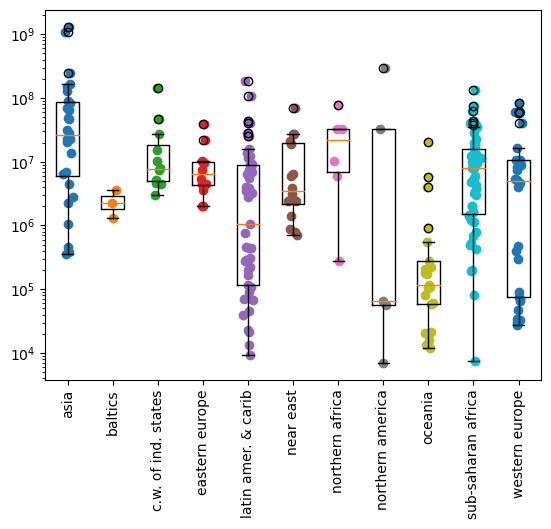

In [14]:
# Log-transform
df = pd.read_csv("data/countries.csv")

fig = plt.figure()
ax = plt.axes()

for i, (r, s) in enumerate(df.groupby("Region")["Population"]):
    r = r.strip().lower()
    ax.scatter(np.random.normal(i+1, 0.05, size=len(s)), s)

ax.boxplot([s for _, s in df.groupby("Region")["Population"]])

ax.set(yscale="log")
plt.xticks(range(1, len(labels)+1), labels, rotation=90)
plt.show()

## Ease comparisons

When we visualize data, we often want to compare different values. Plots should be designed to facilitate comparisons.

In [15]:
df = pd.read_csv("data/weight-height.csv")
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


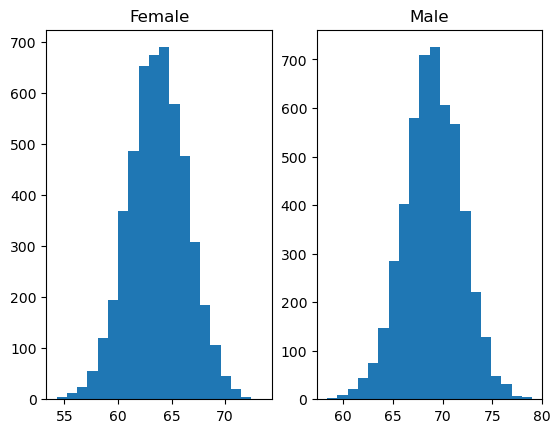

In [16]:
fig, axs = plt.subplots(1, 2)

groups = [(g, s) for g, s in df.groupby("Gender")["Height"]]

for i, (g, s) in enumerate(groups):
    axs[i].hist(s, bins=20)
    axs[i].set(title=g)

plt.show()

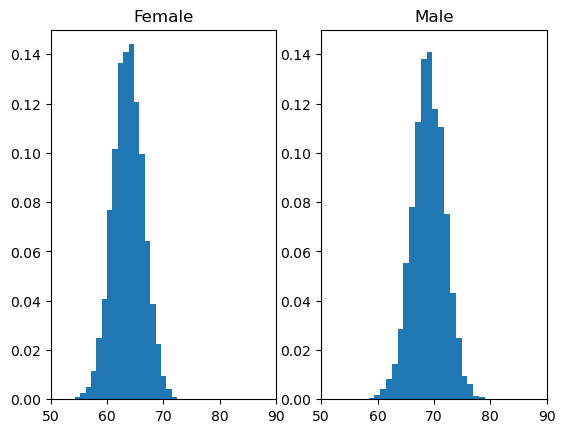

In [17]:
# Use common axes
fig, axs = plt.subplots(1, 2)

groups = [(g, s) for g, s in df.groupby("Gender")["Height"]]

for i, (g, s) in enumerate(groups):
    axs[i].hist(s, bins=20, density=True)
    axs[i].set(title=g, xlim=(50, 90), ylim=(0, 0.15))
    
plt.show()

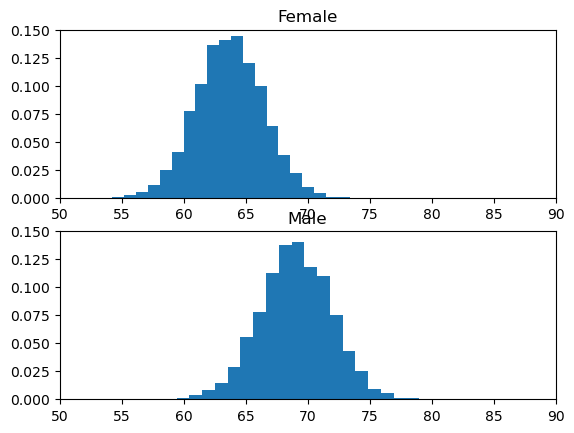

In [18]:
# Align plots
# (vertically to see horizontal changes and vice-versa)
fig, axs = plt.subplots(2, 1)

groups = [(g, s) for g, s in df.groupby("Gender")["Height"]]

for i, (g, s) in enumerate(groups):
    axs[i].hist(s, bins=20, density=True)
    axs[i].set(title=g, xlim=(50, 90), ylim=(0, 0.15))
    
plt.show()

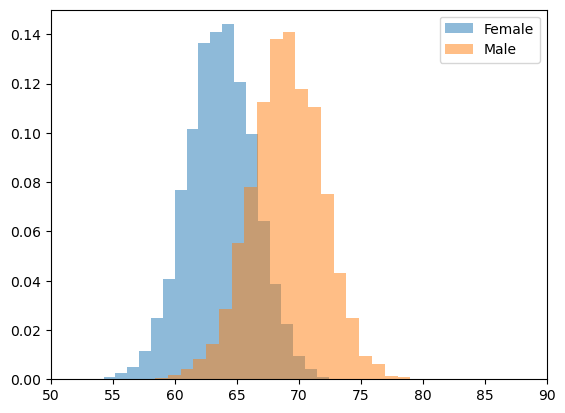

In [21]:
# Or merge them
fig = plt.figure()
ax = plt.axes()

groups = [(g, s) for g, s in df.groupby("Gender")["Height"]]

for i, (g, s) in enumerate(groups):
    ax.hist(s, bins=20, density=True, alpha=0.5)

ax.set(xlim=(50, 90), ylim=(0, 0.15))
ax.legend([g for g, _ in groups])
plt.show()

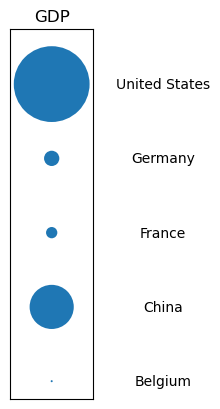

In [23]:
# Don't distort quantities
df = pd.read_csv("data/countries.csv")
df = df.query("Country in ('United States', 'China', 'Germany', 'France', 'Belgium')")

labels = df["Country"].values
values = (df["GDP"] * df["Population"]).values
values /= np.sum(values)

fig = plt.figure()
ax = plt.axes()

for i in range(len(labels)):
    circ = plt.Circle((0, i), radius=values[i])
    ax.add_patch(circ)
    ax.text(1.5, i, labels[i], horizontalalignment='center', verticalalignment='center')

ax.set(aspect="equal", xticks=[], yticks=[], title="GDP")
ax.autoscale_view()
plt.show()

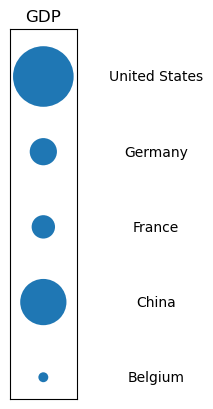

In [25]:
fig = plt.figure()
ax = plt.axes()

for i in range(len(labels)):
    circ = plt.Circle((0, i), radius=(values[i] / np.pi) ** 0.5)
    ax.add_patch(circ)
    ax.text(1.5, i, labels[i], horizontalalignment='center', verticalalignment='center')

ax.set(aspect="equal", xticks=[], yticks=[], title="GDP")
ax.autoscale_view()
plt.show()

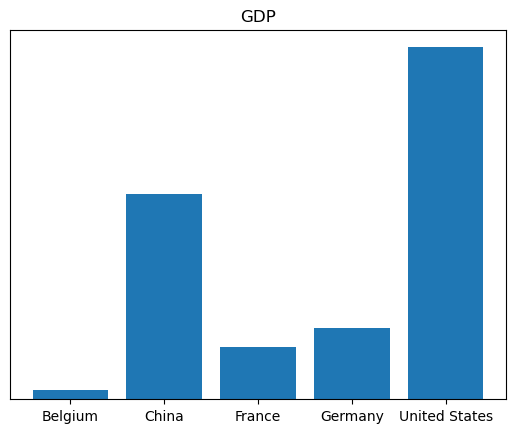

In [26]:
fig = plt.figure()
ax = plt.axes()

ax.bar(labels, values)

ax.set(title="GDP", yticks=[])
plt.show()

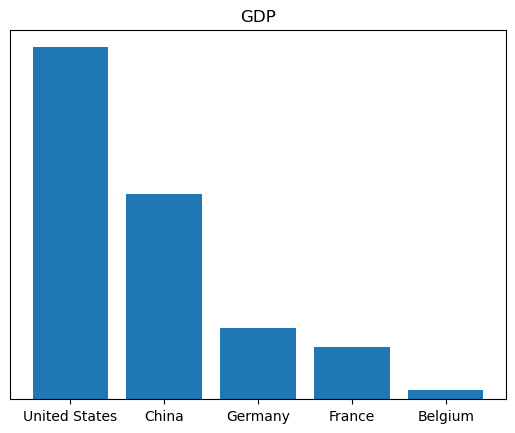

In [27]:
# Sort on a meaningful variable
fig = plt.figure()
ax = plt.axes()

ind = np.argsort(values)[::-1]
ax.bar(labels[ind], values[ind])

ax.set(title="GDP", yticks=[])
plt.show()

## Use colors effectively

Colors bring attention to the data. However, they can also distract from the data. Use colors sparingly and effectively.

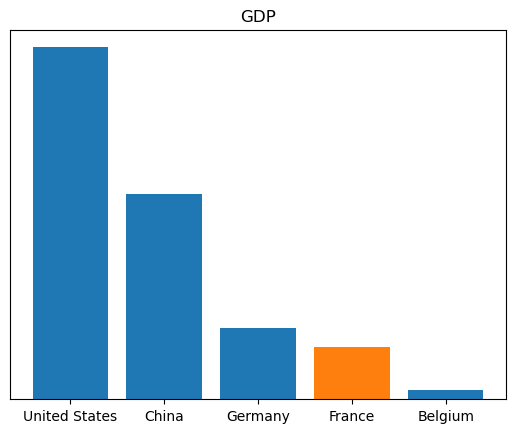

In [28]:
df = pd.read_csv("data/countries.csv")
df = df.query("Country in ('United States', 'China', 'Germany', 'France', 'Belgium')")

labels = df["Country"].values
values = (df["GDP"] * df["Population"]).values
values /= np.sum(values)

fig = plt.figure()
ax = plt.axes()

ind = np.argsort(values)[::-1]
ax.bar(labels[ind], values[ind], color=["C0", "C0", "C0", "C1", "C0"])

ax.set(title="GDP", yticks=[])
plt.show()

## Prefer labels over legends

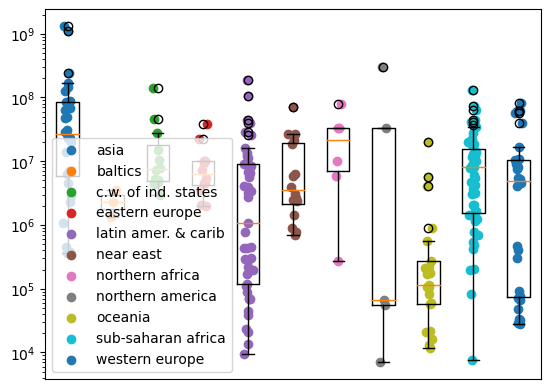

In [29]:
df = pd.read_csv("data/countries.csv")
regions = df.groupby("Region")["Population"].mean()
labels = [r.strip().lower() for r in regions.index]

fig = plt.figure()
ax = plt.axes()

for i, (r, s) in enumerate(df.groupby("Region")["Population"]):
    r = r.strip().lower()
    ax.scatter(np.random.normal(i+1, 0.05, size=len(s)), s, label=r)

ax.boxplot([s for _, s in df.groupby("Region")["Population"]])

ax.set(yscale="log", xticks=[])
ax.legend()
plt.show()

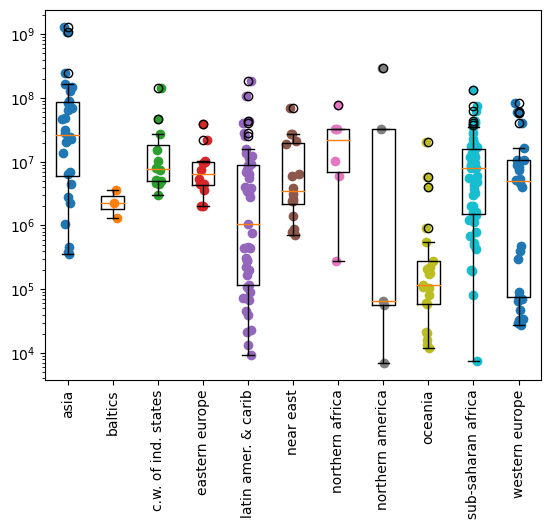

In [30]:
df = pd.read_csv("data/countries.csv")
regions = df.groupby("Region")["Population"].mean()
labels = [r.strip().lower() for r in regions.index]

fig = plt.figure()
ax = plt.axes()

for i, (r, s) in enumerate(df.groupby("Region")["Population"]):
    r = r.strip().lower()
    ax.scatter(np.random.normal(i+1, 0.05, size=len(s)), s)

ax.boxplot([s for _, s in df.groupby("Region")["Population"]])

ax.set(yscale="log", xticks=[])
plt.xticks(range(1, len(labels)+1), labels, rotation=90)
plt.show()

## Choosing the right plot (Jean-Luc Doumont)

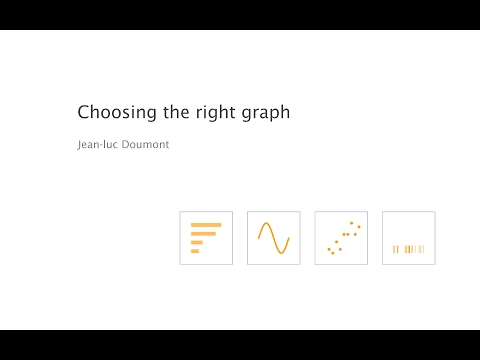

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo("6lm4wJ1qm0w")

# Wrap-up exercise

The beer data set `data/beers.csv` contains around 1.5M reviews of beers from BeerAdvocate. Each review includes the name of the beer, the brewery, the style of beer, the alcohol by volume (ABV), the number of ratings, the score, and the size of the beer.

In [34]:
df = pd.read_csv("data/beers.csv")
df.head(5)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


For each of the exercises below, create a visualization that best answers the question. Follow the principles of data visualization discussed above. Remember to show the data and ease comparisons. Use colors and labels effectively. Remove unnecessary elements.

<div class="alert alert-success">
    
**Exercice**. Plot the ratings of the beers.
    
</div>

<div class="alert alert-success">
    
**Exercice**. Compare the ratings of beers by style or brewery.
    
</div>

<div class="alert alert-success">
    
**Exercice**. Compare the ratings of beers against their alcohol content.
    
</div>